#Modulacion Angular

Sistemas de Comunicaciones - SCT54-2 - 2019-2

Empezamo importando las librerias que utilizaremos.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Modulacion de Frecuencia

$v_m(t)=V_c\cos(2\pi f_c t + m\sin(2\pi f_m t)))$


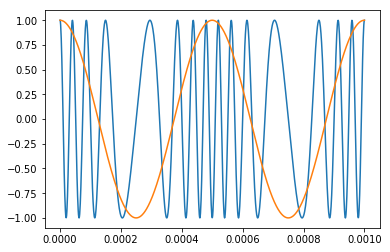

In [0]:
fc = 15e3 #Frecuencia portadora
fm = 2e3  #Frecuencia moduladora
Vm = 1    #Amplitud moduladora
Vc = 1    #Amplitud portadora

deltaf = 10e3
m = deltaf/fm

t = np.linspace(0,2/fm,1024)

mt = Vc*np.cos(2*np.pi*fc*t + m*np.sin(2*np.pi*fm*t)) #Señal modulada en frecuencia

plt.plot(t,mt)
plt.plot(t,Vm*np.cos(2*np.pi*fm*t))

Calculamos la transformada rapida de Fourier, para obtener el espectro de frecuencias de la modulación en frecuencia (FM).

<StemContainer object of 3 artists>

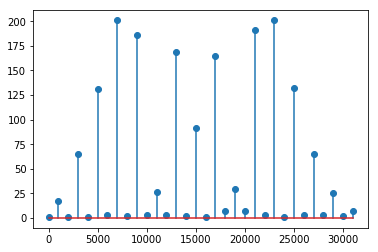

In [0]:
sp = np.fft.fft(mt)
freq = np.fft.fftfreq(t.shape[-1],d=2/(fm*1024))
plt.stem(freq[0:32], np.abs(sp[0:32]))

##Modulacion de Fase <br>
$v_m(t)=V_c\cos(2\pi f_c t + m\cos(2\pi f_m t)))$

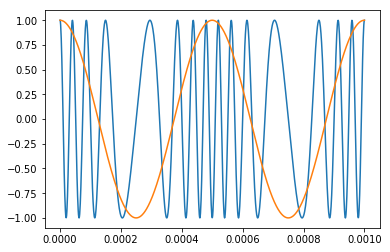

In [0]:
fc = 15e3
fm = 2e3
Vm = 1
Vc = 1

K = 5
m = K*Vm

t = np.linspace(0,2/fm,1024)

mt2 = Vc*np.cos(2*np.pi*fc*t + m*np.cos(2*np.pi*fm*t))
plt.plot(t,mt)
plt.plot(t,Vm*np.cos(2*np.pi*fm*t))

Calculamos la transformada rapida de Fourier, para obtener el espectro de frecuencias de la modulacion en fase (PM).

<StemContainer object of 3 artists>

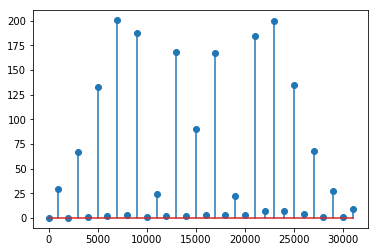

In [0]:
sp2 = np.fft.fft(mt2)
freq2 = np.fft.fftfreq(t.shape[-1],d=2/(fm*1024))
plt.stem(freq2[0:32], np.abs(sp2[0:32]))

Comparamos los espectros de ambas modulaciones

<StemContainer object of 3 artists>

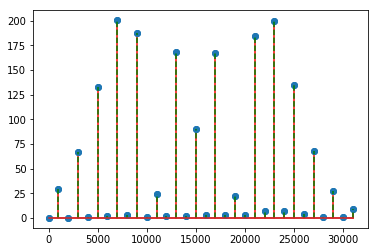

In [0]:
plt.stem(freq[0:32], np.abs(sp2[0:32]),'r')
plt.stem(freq2[0:32], np.abs(sp2[0:32]),'--g')

Esto indica que si se modulan en fase o frecuencia el mismo tono de señal moduladora, entonces ambos espectros son iguales. Tambien indica que las señales moduladas son iguales pero desfasadas ya que el espectro de frecuencias no muestra informacion de la fase.

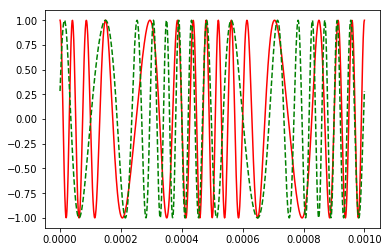

In [0]:
plt.plot(t,mt,'r',t,mt2,'--g')

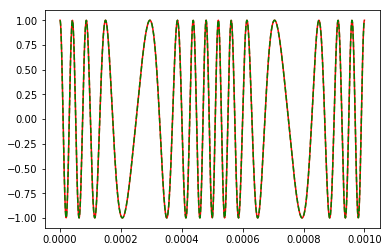

In [0]:
mt3 = Vc*np.cos(2*np.pi*fc*t + m*np.cos(2*np.pi*fm*t - np.pi/2))  #Se agrega el desfase de pi/2
plt.plot(t,mt,'r',t,mt3,'--g')